**Question 1: What is the difference between K-Means and Hierarchical Clustering?Provide a use case for each.**

Answer: **K-Means**
1. The approach used in k means is partitioning.It divides data into k clusters based on distance to centroids.
2. Requires pre specifying number of clusters(k).
3. It is computationally efficient and suitable for large datasets which makes it scalable.
4. performs well with spherical clusters and struggles with irregular shapes.
5. Different runs may give different results.
6. Use cases: A retailer wants to group customers based on purchase patterns,
identifying groups of products that are frequently brought together to inform inventory and sales strategies, indentifying unusual or suspicious activities etc.

**Hierarchical**
1. The approach used is dendogram (a tree like hierarchy) of clusters by successively merging(agglomerative) or splitting(divisive).
2. No need to pre-specify clusters; can cut the dendogram at any level.
3. Computationally expensive as the time complexity is square, best for small/ medium datasets.
4. Can capture complex, nested cluster structures.
5. Produces a deterministic result and provide more interpretability into cluster relationships.
6. Use cases: group genes, proteins or species with similar functions or genetic makeup to understand disease markers, categorize patients into homogenous groups in clinical research, analyze the relationships and structures within social networks to understand user interactions and influence etc.

**Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**

Answer: The main purpose of silhouette score is to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to other clusters.
      s = (b-a) / max(a,b)
where; a = mean distance between a sample and all other points in the same cluster.
b = mean distance between a sample and all other points in the next cluster.

The silhouette score measures the similarity of each point to its own cluster compared to other clusters, and the silhouette plot visualizes these scores for each sample. A high silhouette score indicates that the clusters are well separated, and each sample is more similar to the samples in its own cluster than to samples in other clusters. A silhouette score close to 0 suggests overlapping clusters, and a negative score suggests poor clustering solutions.

Purpose:
1. Check both cohesion and seperation to evaluate cluster quality.
2. Helps in chosing the optimal number of 'k'.
3. helps to decide whether k-means, DBSCAN, or Hierarchical is giving better cluster seperation.

**Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?**

Answer: DBSCAN stands for Density Based Spatial Clustering of Applications with Noise. It is a clustering algorithm that groups together data points that are close in density and marks sparse points as outliers. DBSCAN has a property that it can form clusters based on varying densities and of arbitrary shapes.

The DBSCAN algorithm relies on two main parameters to identify clusters in your data:
- eps: This parameter defines the radius of a neighborhood around a data point. Points within this distance are considered neighbors of the central point.
- minPts: This parameter represents the minimum number of points required within the eps-neighborhood of a point to classify it as a core point. A core point is considered to be dense enough to be part of a cluster.

These parameters work together to identify high-density regions in the data. Points with enough neighbors within the specified distance are grouped together as clusters, while points with insufficient neighbors are classified as noise.

**Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**

Answer: Feature scaling is important when applying clustering algorithms like k-means and DBSCAN because these algorithm are distance based(either use euclidean or manhattan distance). This  means they rely on calculating distance or similarity between data points to group them into clusters.

- Preventing Dominance by features with larger scales:
If features in a dataset have vastly different scales (e.g., age ranging from 0-100 and income ranging from 0-100,000), the feature with the larger range will disproportionately influence the distance calculations. For instance, in Euclidean distance, a small difference in the high-range income feature can easily overshadow a significant difference in the low-range age feature, leading to biased clustering. Scaling ensures all features contribute equally to the distance metric. Ensuring Equal Contribution of Features.
This allows the clustering algorithm to accurately identify patterns and group similar data points based on all relavant characteristics.

- Improved algorithm performance and convergence:
For K-Means, which often uses iterative optimization to find cluster centroids, scaled features can lead to faster convergence of the algorithm. This is because the optimization process (like gradient descent) works more efficiently when features are on a comparable scale, preventing oscillations and reaching a stable solution more quickly.
In summary, feature scaling ensures that distance-based clustering algorithms like K-Means and DBSCAN accurately measure the similarity between data points by preventing features with larger scales from dominating the distance calculations, leading to more robust and meaningful clustering results.

In simple words we can say that K-means and DBSCAN are sensitive to scaling and scaling can enhance their efficiency.

**Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**

Answer: The Elbow Method is a heuristic for finding the optimal number of clusters (k) in K-Means clustering by plotting the Within-Cluster Sum of Squares (WCSS) for different values of k. The "optimal" k is identified at the "elbow" point of the plot, where the rate of decrease in WCSS slows significantly, indicating diminishing returns for adding more clusters. This point represents a balance between having enough clusters to explain the data's structure and avoiding excessive fragmentation.

**Working**:
1. Calculate WCSS: For a range of possible k values (e.g., from 1 to 10), perform K-Means clustering and calculate the WCSS for each k.
2. Plot the results: Create a graph with the number of clusters  on the x-axis and the corresponding WCSS on the y-axis.
3. Identify the "Elbow": Look for a point on the graph where the rate of decrease in WCSS dramatically slows down, forming a bend or "elbow" in the curve.
4. Determine Optimal K: The k value at this elbow point is considered the optimal number of clusters. It suggests that adding more clusters beyond this point does not significantly improve the compactness of the clusters.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sc
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

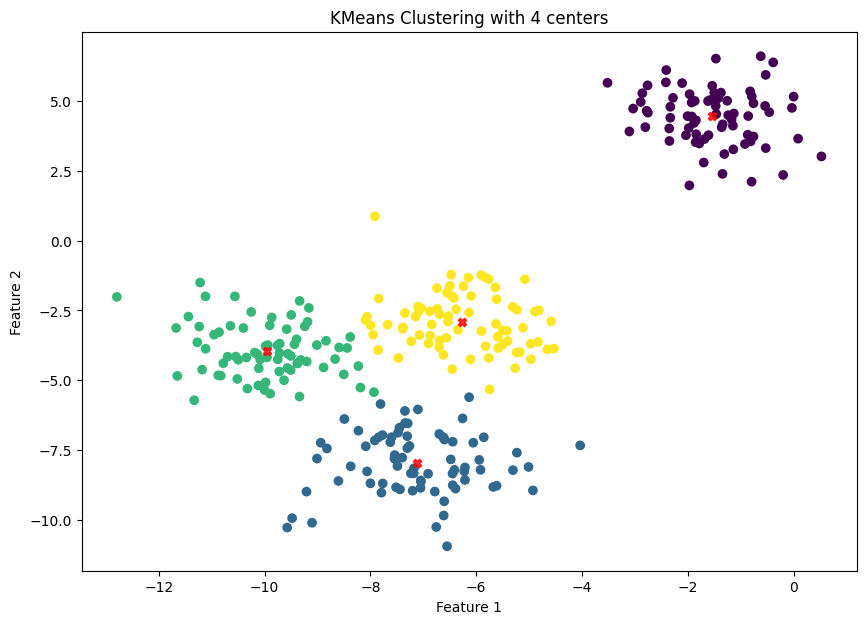

In [19]:
# Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
# apply KMeans clustering, and visualize the results with cluster centers.

# data preprocessing
X,y = make_blobs(n_samples = 300, centers = 4, n_features = 2, random_state = 1)

# model training
k_means = KMeans(n_clusters = 4)

k_means.fit(X)

y_label = k_means.predict(X)

# visualize clusters
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c = y_label)

# plotting the cluster centers
centers = k_means.cluster_centers_
plt.title("KMeans Clustering with 4 centers")
plt.scatter(centers[:,0], centers[:,1], c = 'red', alpha = 0.8, marker = 'X', label = 'Centers')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [20]:
# Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
# model. Print the number of clusters found (excluding noise).

#data preprocessing
data = load_wine()
x, y = data.data, data.target

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#model training
for eps in [1.5, 2, 2.5, 3]:
  for min_sam in range(5,50,5):
    db = DBSCAN(eps = eps, min_samples = min_sam)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Number of clusters found for eps = {eps} and min_samples = {min_sam}: {n_clusters}")

Number of clusters found for eps = 1.5 and min_samples = 5: 0
Number of clusters found for eps = 1.5 and min_samples = 10: 0
Number of clusters found for eps = 1.5 and min_samples = 15: 0
Number of clusters found for eps = 1.5 and min_samples = 20: 0
Number of clusters found for eps = 1.5 and min_samples = 25: 0
Number of clusters found for eps = 1.5 and min_samples = 30: 0
Number of clusters found for eps = 1.5 and min_samples = 35: 0
Number of clusters found for eps = 1.5 and min_samples = 40: 0
Number of clusters found for eps = 1.5 and min_samples = 45: 0
Number of clusters found for eps = 2 and min_samples = 5: 5
Number of clusters found for eps = 2 and min_samples = 10: 1
Number of clusters found for eps = 2 and min_samples = 15: 0
Number of clusters found for eps = 2 and min_samples = 20: 0
Number of clusters found for eps = 2 and min_samples = 25: 0
Number of clusters found for eps = 2 and min_samples = 30: 0
Number of clusters found for eps = 2 and min_samples = 35: 0
Number o

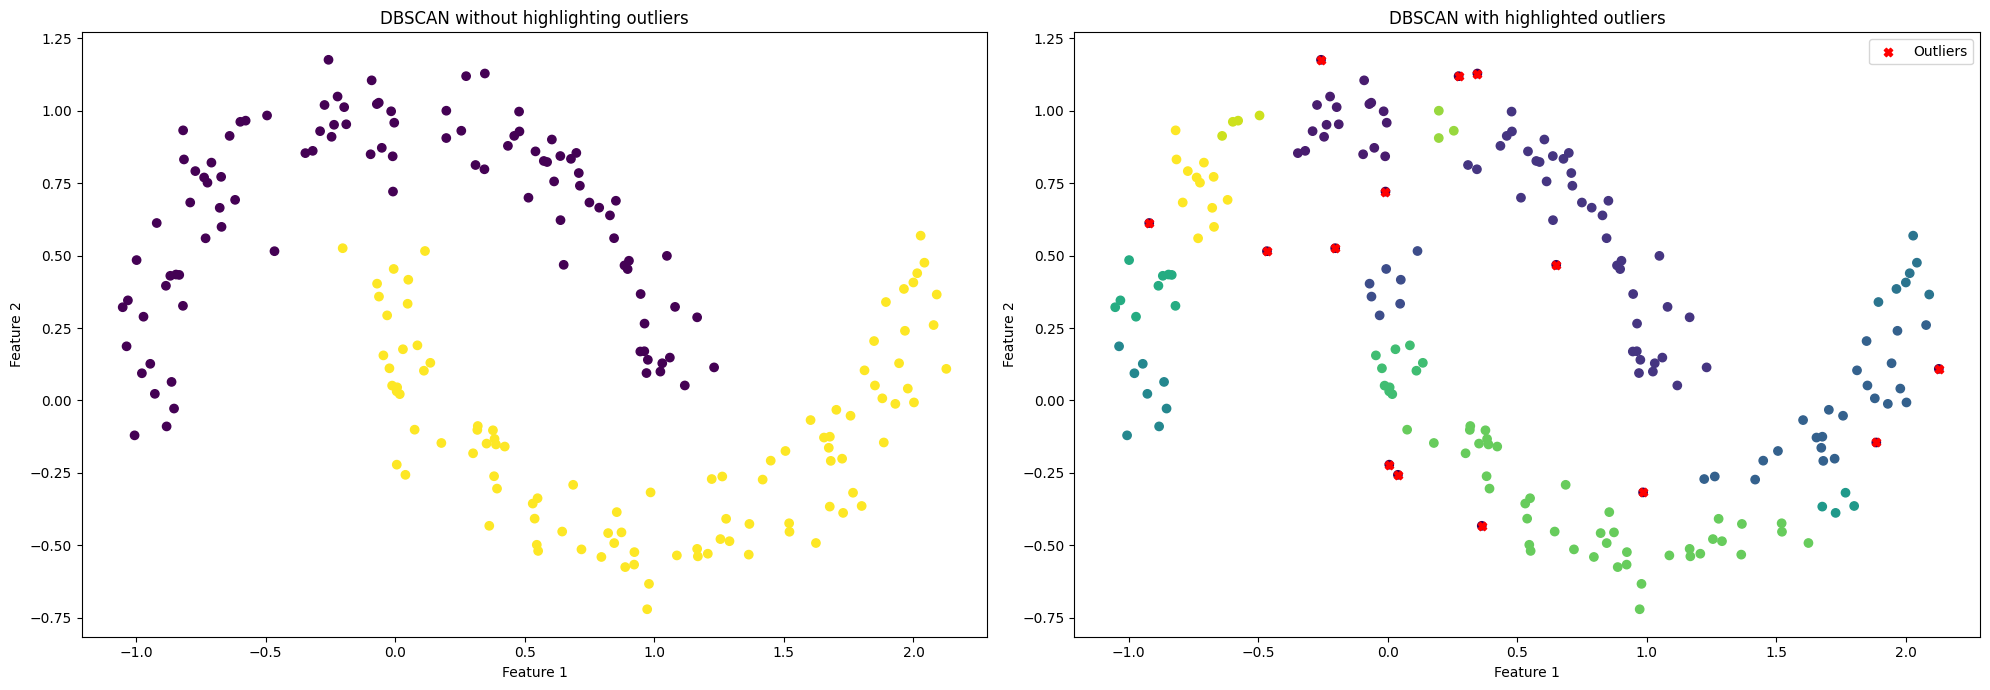

In [30]:
# Question 8: Generate moon-shaped synthetic data using
# make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
# the plot.

# data preprocessing
X, y = make_moons(n_samples = 200, noise = 0.1, random_state = 1)

# scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# model training
db = DBSCAN(eps = 0.2, min_samples = 3)
db.fit(x_scaled)
labels = db.labels_
# plotting
fig, axes = plt.subplots(1, 2, figsize = (20,7))
axes[0].set_title("DBSCAN without highlighting outliers")
axes[0].scatter(X[:,0], X[:,1], c = y)
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[1].set_title("DBSCAN with highlighted outliers")
axes[1].scatter(X[:,0], X[:,1], c = labels)
axes[1].scatter(X[labels == -1, 0], X[labels == -1, 1], color = 'red', marker = 'X', label = 'Outliers')
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].legend()
plt.tight_layout()
plt.show()

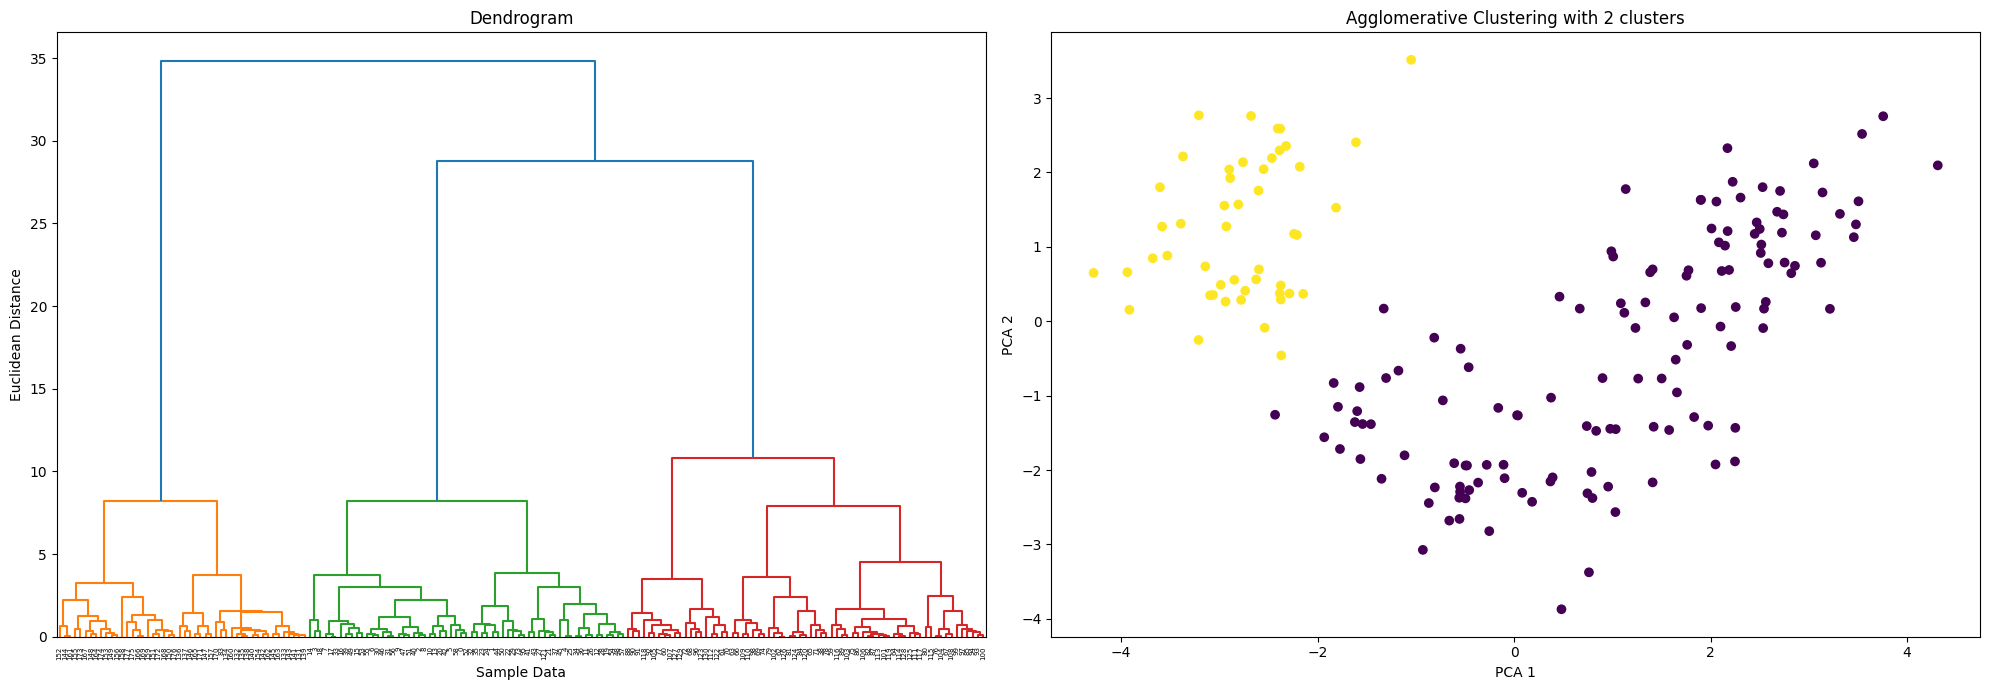

Silhouette score for two clusters : 0.47359230795635215


In [23]:
# Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
# Agglomerative Clustering and visualize the result in 2D with a scatter plot.

#data preprocessing
data = load_wine()
x, y = data.data, data.target

#scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# reduce the dimension to 2D
pca = PCA(n_components = 2) #as we have to convert into 2D
pca_scaled = pca.fit_transform(x_scaled)

# plotting dendogram
fig, axes = plt.subplots(1, 2, figsize = (20,7))
axes[0].set_title("Dendrogram")
sc.dendrogram(sc.linkage(pca_scaled, method = 'ward'), ax = axes[0])
axes[0].set_xlabel("Sample Data")
axes[0].set_ylabel("Euclidean Distance")

# model training
cluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
cluster.fit(pca_scaled)
labels = cluster.labels_

# plotting

axes[1].set_title("Agglomerative Clustering with 2 clusters")
axes[1].scatter(pca_scaled[:,0], pca_scaled[:,1], c = labels)
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

#model evaluation
score = silhouette_score(pca_scaled, cluster.labels_)
print(f"Silhouette score for two clusters : {score}")

**Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?**

Answer: As a data analyst in a e-commerce company, I will perform some task to choose a suitable algorithm for clustering and perform preprocessing on dataset like: scaling, handling missing values etc, after that we have to determine the number of clusters which best fitted for the clustering, at last I will produce some insights for business growth.
  Let us discuss in depth:
 **Choosing a clustering algorithm:**
- We have three custering algorithm and we have to choose the most suitable one.
- K means is suitable when we expect well-seperated, spherical clusters, it is efficient for large datasets.
- Hierarchical clustering is useful for small subsets or to visualize customer relationships with a dendrogram.
- DBSCAN can be used when there is arbitrary shape on scatter plot and have noise in the datasets.

    Out of all these we can say that K-Means will be best suited for our analysis.

 **Data Preprocessing:**
- In this phase, we perform feature engineering and scaling, handle some missing values and reduce the dimensions(features).
- If the numerical column if there are some missing value we will replace it with mean or median of the column.
- For categorical column we can replace
with mode.
- Create some features like total spend, frequency of purchases, average shopping size, category preference for better insight.
- Scaing can enhance the clustering algo.
- Apply PCA to reduce the dimension and eliminate the least valued feature.

**Determining the Number of Clusters:**
- To determine the number of clusters  we have different methods like: Elbow method, silhouette score.
- Elbow method: Plot the inertia vs number of clusters and look for th elbow point.
- Silhouette score: measures how well samples are clustered; values close to 1 indicate better seperation.
- Most of the time business team can tell you how many clusters(segments) they needed.

**Benefits for the marketing team:**
1. Targeted Promotions:
- High spenders → Loyalty programs & exclusive offers.
- Occasional buyers → Discount coupons to increase frequency.
- Category specialists (e.g., electronics-only buyers) → Personalized category promotions.

2. Customer Retention: Identify “at-risk” customers who reduced purchases and send re-engagement offers.

3. Product Recommendations: Suggest products based on similar cluster members behavior.

4. Strategic Insights:
- Understand demographics of high-value clusters.
- Design marketing strategies tailored to each cluster (regional offers, seasonal promotions).

    These segment could give positive impact on business values like: it can increase the ROI(Return on Investment), imporved customer satisfaction which can build trust between customer can company.
    